In [1]:
import pandas as pd

# Sample data
data = {
    'Date': ['2025-05-01', '2025-05-01', '2025-05-01', '2025-05-02', '2025-05-02'],
    'Time': ['08:30', '09:00', '14:00', '08:15', '15:30'],
    'Drink': ['Latte', 'Espresso', 'Iced Coffee', 'Latte', 'Iced Coffee'],
    'Price': [4.5, 3.0, 4.0, 4.5, 4.0],
    'Weather': ['Sunny', 'Sunny', 'Sunny', 'Rainy', 'Rainy']
}

df = pd.DataFrame(data)


In [2]:
df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])
df['Hour'] = df['Datetime'].dt.hour
print(df)


         Date   Time        Drink  Price Weather            Datetime  Hour
0  2025-05-01  08:30        Latte    4.5   Sunny 2025-05-01 08:30:00     8
1  2025-05-01  09:00     Espresso    3.0   Sunny 2025-05-01 09:00:00     9
2  2025-05-01  14:00  Iced Coffee    4.0   Sunny 2025-05-01 14:00:00    14
3  2025-05-02  08:15        Latte    4.5   Rainy 2025-05-02 08:15:00     8
4  2025-05-02  15:30  Iced Coffee    4.0   Rainy 2025-05-02 15:30:00    15


In [3]:
drink_counts = df['Drink'].value_counts()
print(drink_counts)


Drink
Latte          2
Iced Coffee    2
Espresso       1
Name: count, dtype: int64


In [4]:
hourly_sales = df['Hour'].value_counts().sort_index()
print(hourly_sales)


Hour
8     2
9     1
14    1
15    1
Name: count, dtype: int64


In [5]:
weather_sales = df.groupby('Weather')['Price'].sum()
print(weather_sales)


Weather
Rainy     8.5
Sunny    11.5
Name: Price, dtype: float64


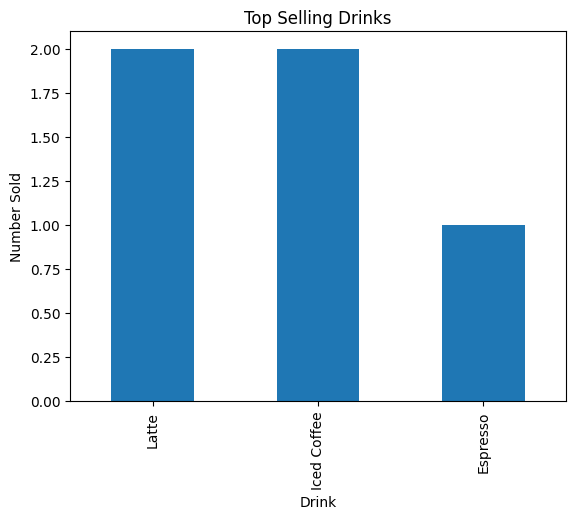

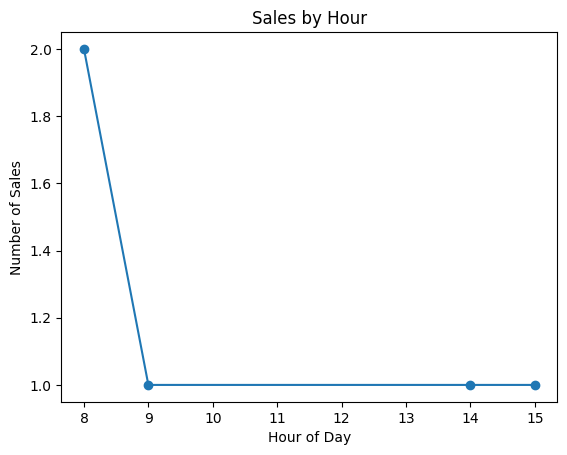

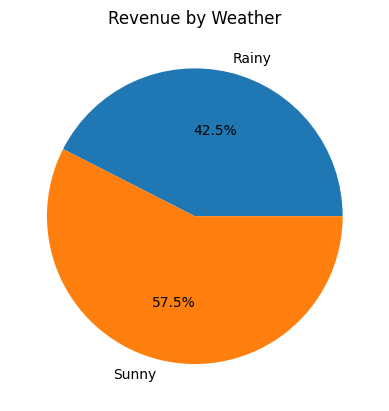

In [6]:
import matplotlib.pyplot as plt

# Drink popularity
drink_counts.plot(kind='bar', title='Top Selling Drinks')
plt.xlabel('Drink')
plt.ylabel('Number Sold')
plt.show()

# Hourly sales
hourly_sales.plot(kind='line', marker='o', title='Sales by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Sales')
plt.show()

# Weather comparison
weather_sales.plot(kind='pie', title='Revenue by Weather', autopct='%1.1f%%')
plt.ylabel('')
plt.show()
